In [11]:
import warnings
warnings.filterwarnings("ignore")

from IPython.display import Image

import mbuild as mb
from mbuild.lib.recipes import Polymer as mbPolymer

# Polyvinylidene Fluoride (PVDF)

https://en.wikipedia.org/wiki/Polyvinylidene_fluoride

>It is available in the form of piping products, sheet, tubing, films, plate and an insulator for premium wire. It can be injected, molded or welded and is commonly used in the chemical, semiconductor, medical and defense industries

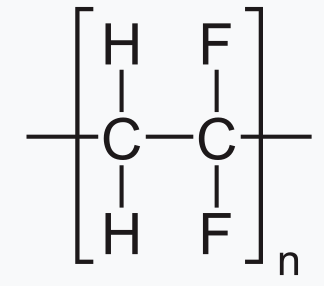

In [12]:
Image("pvdf.png")

# Using mBuild:

In [14]:
smiles = "C-C(F)F"
pvdf = mb.load(smiles, smiles=True)
pvdf.visualize(backend="py3Dmol")

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [16]:
poly_pvdf = mbPolymer()
poly_pvdf.add_monomer(compound=pvdf, indices=[4, -1], replace=True, separation=0.16)
poly_pvdf.build(n=5)
poly_pvdf.visualize()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

# Back in FlowerMD:

In [4]:
from flowermd.base import Polymer

class PVDF(Polymer):
    """Polyvinylidene Fluoride"""
    def __init__(self, lengths, num_mols):
        smiles = "C-C(F)F"
        bond_indices = [4, -1]
        bond_length = 0.16
        bond_orientation = [None, None]
        super(PVDF, self).__init__(
            lengths=lengths,
            num_mols=num_mols,
            smiles=smiles,
            bond_indices=bond_indices,
            bond_length=bond_length,
            bond_orientation=bond_orientation
        )

In [19]:
pvdf = PVDF(num_mols=10, lengths=20)
pvdf.molecules[9].visualize()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [6]:
from flowermd.library.polymers import PVDF
from flowermd.library.forcefields import GAFF
from flowermd.base import Pack

In [7]:
pvdf = PVDF(num_mols=10, lengths=20)
system = Pack(molecules=pvdf, density=1.27)
system.apply_forcefield(force_field=GAFF(), r_cut=2.5, auto_scale=True)

No charged group detected, skipping electrostatics.


In [8]:
from flowermd.modules.welding import SlabSimulation

In [10]:
slab_sim = SlabSimulation(initial_state=system.hoomd_snapshot, forcefield=system.hoomd_forcefield, interface_axis=(1, 0, 0))

Initializing simulation state from a gsd.hoomd.Frame.


In [ ]:
slab_sim.run_NVT(n_steps=100, tau_kt=100*slab_sim.dt, kT=4.0)